# Lab 3: Fourier spectral analysis

#### Author: Yuriy Pasichnyk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [3]:

def print_signal(data, t, p_title='Signal plot', label=None, p_signal_axes='Voltage, V', extert_plt=False,
                        create_plt=True):
    # Plot
    if create_plt:
        plt.figure(figsize=(17, 7))
    
    plt.plot(t, data, label=label)
    
    if create_plt:
        plt.title(p_title)
        plt.xlabel('Time, s')
        plt.ylabel(p_signal_axes)
        plt.grid(True)
    
    if not extert_plt:
        if label is not None:
            plt.legend()
        plt.grid(True)
        plt.show()

def plot_signal_segment(signal, start_t, end_t, freq, p_title='Signal plot', label=None,
                        p_signal_axes='signal', p_size=(15, 7), get_segment=False, extert_plt=False,
                        create_plt=True):
    # Validate
    tatal_t = len(signal) / freq # time in sec
    if start_t > end_t or end_t > tatal_t:
        raise RuntimeError("Invalid time range boundaries!")
    
    # Data construct
    start_i = int(start_t * freq)
    end_i = int(end_t * freq)
    signal_s = signal[start_i:end_i]
    t = np.arange(start_t, end_t - 1 / freq, 1 / freq)
    
    # Plot
    if create_plt:
        plt.figure(figsize=p_size)
    
    plt.plot(t, signal_s, label=label)
    
    if create_plt:
        plt.title(p_title)
        plt.xlabel('Time, s')
        plt.ylabel(p_signal_axes)
    
    if not extert_plt:
        if label is not None:
            plt.legend()
        plt.grid(True)
        plt.show()
    
    if get_segment:
        return t, signal_s

    
def rad_s2hz(rad_s_arr, freq):
    return freq * rad_s_arr / np.pi

def print_frequency_response_for_n(b, a, n, freq=None):  # КЧХ
    w, h = signal.freqz(b, a, worN=n)
    if freq is not None:
        w = rad_s2hz(w, freq)
    plt.figure(figsize=(15,5))
    plt.stem(w, np.real(h))
    if freq is None:
        plt.xlabel('Frequency (rad/sample)')
    else:
        plt.xlabel('Frequency (Hz)')
    plt.ylabel('Frequency response')
    plt.title(f'DSM frequency response for n={n}')
    plt.grid(True)
    plt.show()

def print_magniture_response(b, a, freq=None):  # АЧХ
    w, h = signal.freqz(b, a)
    if freq is not None:
        w = rad_s2hz(w, freq)
    plt.figure(figsize=(15,5))
    plt.plot(w, np.absolute(h))
    if freq is None:
        plt.xlabel('Frequency (rad/sample)')
    else:
        plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude Response')
    plt.title('DSM magniture response')
    plt.grid(True)
    plt.show()

def print_phase_response(b, a, freq=None):    # ФЧХ
    w, h = signal.freqz(b, a)
    if freq is not None:
        w = rad_s2hz(w, freq)
    phase = np.unwrap(np.arctan2(np.imag(h), np.real(h)))
    plt.figure(figsize=(15,5))
    plt.plot(w, phase)
    if freq is None:
        plt.xlabel('Frequency (rad/sample)')
    else:
        plt.xlabel('Frequency (Hz)')
    plt.ylabel('Phase (radians)')
    plt.title('DSM Phase Response')
    plt.grid(True)
    plt.show()


# Part 1: Spectral Analysis

## Task 1

- Сформувати вектор відліків часу тривалістю 1 с для частоти дискретизації 128 Гц.
- Сформувати сигнали ділянки синусоїди частотою 2, 2.5, 40, 100, 600 Гц.
- Врахувати необхідність дотримання періодичності дискретного сигналу для отримання адекватного спектру.
- Побудувати за допомогою функції plot графіки сигналів та за допомогою функції stem графіки їх амплітудних спектрів.
- Зробити висновки щодо відповідності отриманих спектрів тим, які повинні бути отримані згідно теоретичних міркувань.


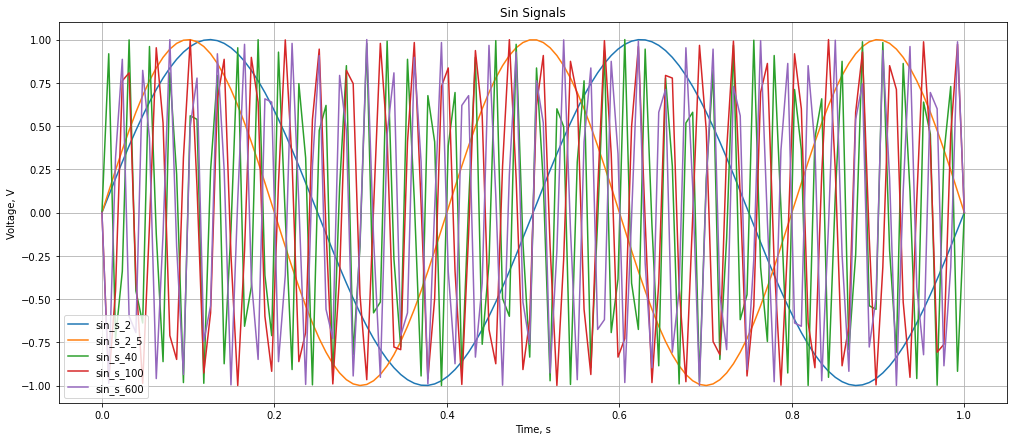

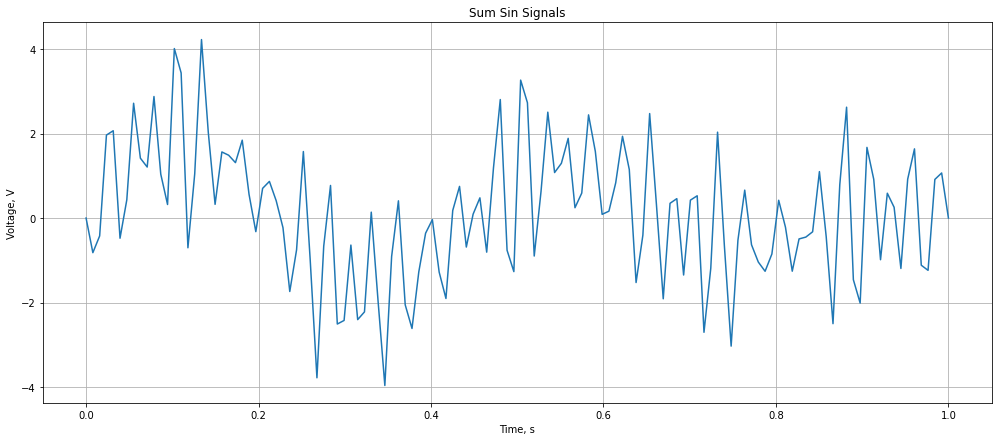

In [11]:
sin_d_freq = 128
sin_t = np.linspace(0, 1, sin_d_freq, endpoint=True)

def get_sin_s(t, freq):
    return np.sin(t * 2 * np.pi * freq)
sin_s_2   = get_sin_s(sin_t, 2)
sin_s_2_5 = get_sin_s(sin_t, 2.5)
sin_s_40  = get_sin_s(sin_t, 40)
sin_s_100 = get_sin_s(sin_t, 100)
sin_s_600 = get_sin_s(sin_t, 600)

print_signal(sin_s_2, sin_t, "Sin Signals", label="sin_s_2", extert_plt=True)
print_signal(sin_s_2_5, sin_t, label="sin_s_2_5", extert_plt=True, create_plt=False)
print_signal(sin_s_40, sin_t, label="sin_s_40", extert_plt=True, create_plt=False)
print_signal(sin_s_100, sin_t, label="sin_s_100", extert_plt=True, create_plt=False)
print_signal(sin_s_600, sin_t, label="sin_s_600", create_plt=False)
sin_ss = sin_s_2 + sin_s_2_5 + sin_s_40 + sin_s_100 + sin_s_600
print_signal(sin_ss, sin_t, "Sum Sin Signals")

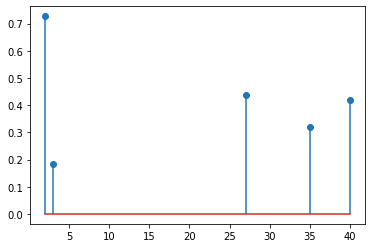

In [30]:
# sin_ss_fr, sin_ss_ampl = signal.periodogram(sin_ss, fs=sin_d_freq, detrend=False)
# mask = sin_ss_ampl > 0.1

# plt.stem(sin_ss_fr[mask], sin_ss_ampl[mask], use_line_collection=True)
# plt.show()